In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("CAPEX L.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1
163,164,255008,Wardwizard Innovations & Mobility Ltd.,12.096054,31.919243,61.724532,1481.263308,C
164,165,132553,Welspun Enterprises Ltd.,236.862686,-52.633433,27.885116,4162.872450,C
165,166,275557,Yasho Industries Ltd.,94.095198,77.562000,60.461251,1839.203924,C
166,167,308651,Zaggle Prepaid Ocean Services Ltd.,2.755090,51.478937,52.735547,3520.975050,C
167,168,285652,Zota Health Care Ltd.,70.767252,77.288495,71.285045,1226.454385,C


In [3]:
df1["GB+CWIP_CAPEX_SUM"] = df1["GB+CWIP_1Y_CAGR"] + df1["GB+CWIP_2Y_CAGR"] + df1["GB+CWIP_3y_CAGR"]

print("mean std for cagr")
mean_value = df1['GB+CWIP_CAPEX_SUM'].mean()
print(mean_value)
std_dev = df1['GB+CWIP_CAPEX_SUM'].std()
print(std_dev)

df1['ZSCORE_CAPEX'] = (df1['GB+CWIP_CAPEX_SUM']-mean_value) / std_dev

print("mean std for mcap")
mean_value = df1['FH_Market Capitalization'].mean()
print(mean_value)
std_dev = df1['FH_Market Capitalization'].std()
print(std_dev)

df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev

df1.tail()

mean std for cagr
3957.113935913154
44907.960429541425
mean std for mcap
4119.879330675595
4514.740982156812


,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,ZSCORE_MCAP
163,164,255008,Wardwizard Innovations & Mobility Ltd.,12.096054,31.919243,61.724532,1481.263308,C,105.739829,-0.085762,-0.584445
164,165,132553,Welspun Enterprises Ltd.,236.862686,-52.633433,27.885116,4162.872450,C,212.114369,-0.083393,0.009523
165,166,275557,Yasho Industries Ltd.,94.095198,77.562000,60.461251,1839.203924,C,232.118449,-0.082947,-0.505162
166,167,308651,Zaggle Prepaid Ocean Services Ltd.,2.755090,51.478937,52.735547,3520.975050,C,106.969574,-0.085734,-0.132655
167,168,285652,Zota Health Care Ltd.,70.767252,77.288495,71.285045,1226.454385,C,219.340792,-0.083232,-0.640884


In [4]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [5]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,GB+CWIP_1Y_CAGR,GB+CWIP_2Y_CAGR,GB+CWIP_3y_CAGR,FH_Market Capitalization,CONS_FH_1,GB+CWIP_CAPEX_SUM,ZSCORE_CAPEX,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,304714,Aether Industries Ltd.,57.659154,81.129347,68.502609,10347.515750,C,207.291110,-0.083500,...,14.53,14.40,3.43,9.90,9.72,2.0,Chemicals & Petrochemicals,Specialty Chemicals,2024-12-31,2025-01-17
1,2,131921,Agarwal Industrial Corporation Ltd.,64.970873,59.167226,51.112435,1197.371890,C,175.250533,-0.084214,...,14.53,17.29,9.75,9.90,10.64,5.0,Chemicals & Petrochemicals,Petrochemicals,2024-12-31,2025-02-13
2,3,272417,AGI Infra Ltd.,51.722054,9.530562,30.938407,1105.000515,C,92.191022,-0.086063,...,9.66,10.57,4.82,4.59,4.99,5.0,Realty,Realty,2024-12-31,2025-02-05
3,4,310218,Allcargo Terminals Ltd.,5.541657,137.658569,NaN,1310.048406,C,NaN,NaN,...,132.52,13.61,5.62,8.54,8.59,6.0,Transportation,Warehousing & Logistics,2024-12-31,2025-02-10
4,5,277374,Antony Waste Handling Cell Ltd.,81.057200,55.997988,37.547088,1308.428892,C,174.602276,-0.084228,...,19.18,17.20,5.89,7.09,12.34,5.0,Utilities,Waste Management,2024-12-31,2025-02-14


In [6]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = (0.6 * final_merged_df['ZSCORE_CAPEX']) + (0.2 * final_merged_df['ZSCORE_MCAP']) + (0.10 * final_merged_df['ZSCORE_PE']) + (0.10 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head(5)

final_merged_df.to_csv("rahul_s1l1.csv")

In [ ]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2024-03-31")
end_date = pd.to_datetime("2025-03-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['ABFRL', 'BALAXI', 'BATAINDIA', 'BLUEDART', 'CREDITACC', 'HAPPSTMNDS', 'NURECA', 'RESPONIND', 'SFL', 'SWANENERGY', 'ZYDUSWELL']


C:\Users\meets\AppData\Local\Temp\ipykernel_7460\562465907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])


,Date,ABFRL,BALAXI,BATAINDIA,BLUEDART,CREDITACC,HAPPSTMNDS,NURECA,RESPONIND,SFL,SWANENERGY,ZYDUSWELL
0,2021-04-01,-0.011429,0.050048,0.013405,0.003023,-0.005740,0.100917,0.000749,0.089767,0.005665,0.011066,0.006822
1,2021-04-05,-0.058809,0.028143,-0.019999,-0.039026,-0.054356,0.040787,0.121197,-0.049423,0.059451,-0.001094,0.013199
2,2021-04-06,0.013618,0.008830,-0.004726,-0.006765,-0.021803,0.079913,0.028396,-0.008377,0.014765,-0.013514,0.031797
3,2021-04-07,0.009484,0.049891,-0.001547,0.001874,0.004944,0.005911,-0.019465,0.064958,-0.008327,0.006294,0.005662
4,2021-04-08,-0.009916,0.001251,0.012538,-0.014617,-0.008468,-0.011381,0.039850,-0.045952,-0.001746,-0.001840,-0.005630


In [8]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

,Stock Code,PORTFOLIO_WEIGHTS
0,ABFRL,0.056135
4,BALAXI,0.489793
6,BATAINDIA,0.054613
10,BLUEDART,0.030617
14,CREDITACC,0.067590
19,HAPPSTMNDS,0.010238
33,NURECA,0.072769
37,RESPONIND,0.001391
42,SFL,0.009346
45,SWANENERGY,0.094060


In [9]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              745 non-null    datetime64[ns]
 1   Portfolio Return  745 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [10]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
final_portfolio_benchmark.to_csv("s1l3b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2021-04-01   2021-04-01
End Period                 2024-04-02   2024-04-02
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          65.87%       39.32%
CAGR﹪                     12.33%       7.92%

Sharpe                     1.31         0.55
Prob. Sharpe Ratio         98.51%       82.77%
Smart Sharpe               1.27         0.53
Sortino                    1.8          0.81
Smart Sortino              1.74         0.79
Sortino/√2                 1.27         0.57
Smart Sortino/√2           1.23         0.56
Omega                      1.11         1.11

Max Drawdown               -18.35%      -29.07%
Longest DD Days            407          520
Volatility (ann.)          13.83%       27.17%
R^2                        0.19         0.19
Information Ratio          -0.01        -0.01
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-10-11,2022-02-24,2022-08-29,323,-29.065233,-24.854785
2,2022-09-13,2023-10-23,2024-02-14,520,-25.187292,-24.523693
3,2024-02-21,2024-03-13,2024-04-02,42,-19.374081,-18.099907
4,2021-05-28,2021-08-23,2021-10-06,132,-13.268906,-11.738987
5,2021-04-28,2021-05-04,2021-05-07,10,-2.594956,-2.197674


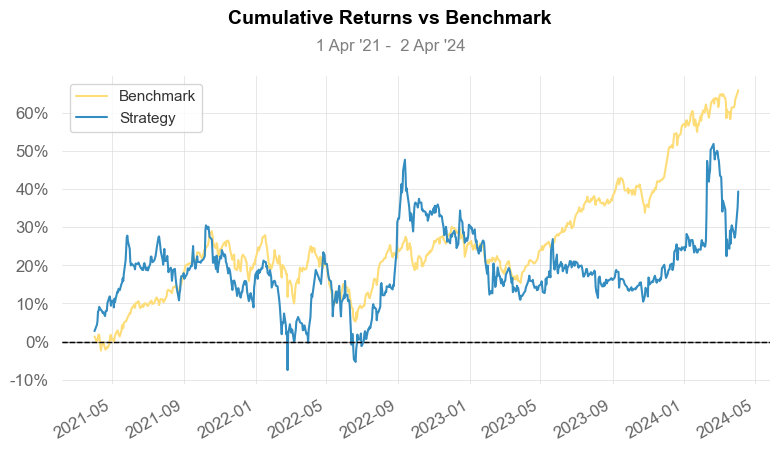

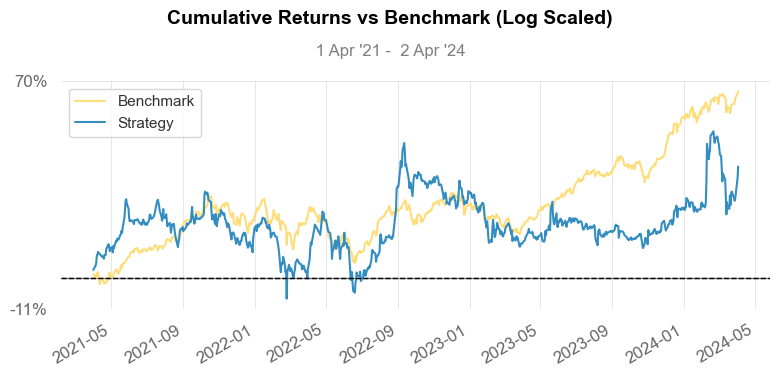

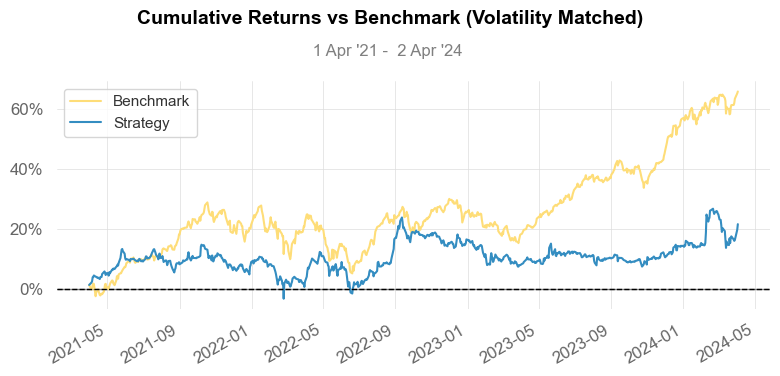

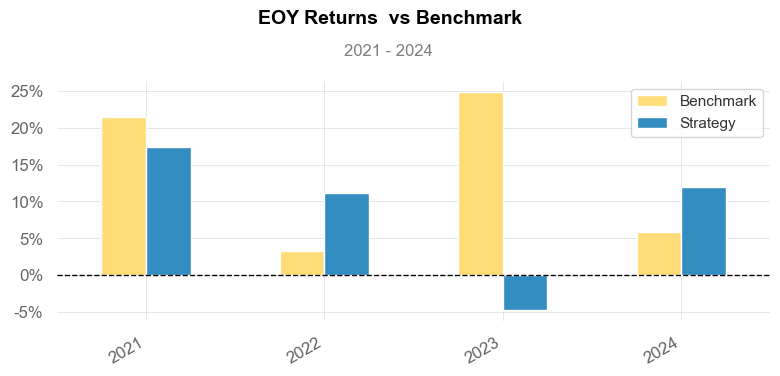

OptionError: No such keys(s): 'mode.use_inf_as_null'

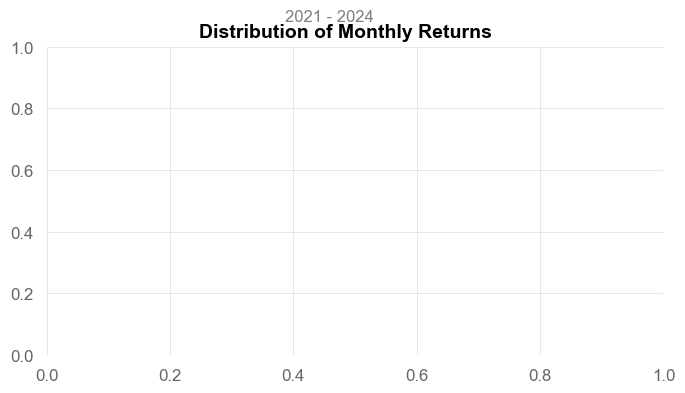

In [11]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")